# Analysis and Visualization of Complex Agro-Environmental Data
---
## Descriptive statistics

As an example we will work on a subset of a database that resulted from integrating information from several river fish biomonitoring programmes accross Europe. This subset includes data for some Mediterranean countries. Each case (rows) corresponds to a fish sampling point. Variables (columns) includes coordinates, country and catchment identifiers, local scale environmental variables, climatic variables, human pressures and fish presence/absence data.

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using tables, histograms, box plots, and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

We will be going over how to perform some basic visualisations in Python, and, most importantly, we will learn how to begin exploring data from a graphical perspective.

In [1]:
# The following command tells the IPython environment to draw the plots immediately after the current cell - In new ipython versions it is the default (run just %matplotlib to cancel)
%matplotlib inline

import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

#### Import, visualize and summarize table properties

In [2]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

In [3]:
print(df)

       Site_code   Latitude  Longitude   Country Catchment_name  Galiza  \
0     ES_01_0002  38.102003  -4.096070     Spain   Guadalquivir       0   
1     ES_02_0001  40.530188  -1.887796     Spain           Tejo       0   
2     ES_02_0002  40.595432  -1.928079     Spain           Tejo       0   
3     ES_02_0003  40.656184  -1.989831     Spain           Tejo       0   
4     ES_02_0004  40.676402  -2.036274     Spain           Tejo       0   
...          ...        ...        ...       ...            ...     ...   
5006      PTVO60  40.641612  -8.325149  Portugal          Vouga       0   
5007      PTVO61  40.729015  -8.098851  Portugal          Vouga       0   
5008      PTVO62  40.727959  -8.107344  Portugal          Vouga       0   
5009      PTVO63  40.817783  -8.224903  Portugal          Vouga       0   
5010      PTVO64  40.794352  -8.255380  Portugal          Vouga       0   

      Subsample  Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  \
0             1              

In [4]:
df.head(10)

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,ES_02_0005,40.732830,-2.078003,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,ES_02_0006,40.788013,-2.152441,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7,ES_02_0007,40.793682,-2.285236,Spain,Tejo,0,1,1,1,0,...,0,1,0,0,0,0,1,0,0,0
8,ES_02_0008,40.747652,-2.394504,Spain,Tejo,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,ES_02_0010,40.807161,-1.838133,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 6.3+ MB


In [6]:
list(df.columns)

['Site_code',
 'Latitude',
 'Longitude',
 'Country',
 'Catchment_name',
 'Galiza',
 'Subsample',
 'Calib_EFI_Medit',
 'Calib_connect',
 'Calib_hydrol',
 'Calib_morphol',
 'Calib_wqual',
 'Geomorph1',
 'Geomorph2',
 'Geomorph3',
 'Water_source_type',
 'Flow_regime',
 'Altitude',
 'Geological_typology',
 'Actual_river_slope',
 'Natural_sediment',
 'Elevation_mean_catch',
 'prec_ann_catch',
 'temp_ann',
 'temp_jan',
 'temp_jul',
 'Barriers_catchment_down',
 'Barriers_river_segment_up',
 'Barriers_river_segment_down',
 'Barriers_number_river_segment_up',
 'Barriers_number_river_segment_down',
 'Barriers_distance_river_segment_up',
 'Barriers_distance_river_segment_down',
 'Impoundment',
 'Hydropeaking',
 'Water_abstraction',
 'Hydro_mod',
 'Temperature_impact',
 'Velocity_increase',
 'Reservoir_flushing',
 'Sedimentation',
 'Channelisation',
 'Cross_sec',
 'Instream_habitat',
 'Riparian_vegetation',
 'Embankment',
 'Floodprotection',
 'Floodplain',
 'Toxic_substances',
 'Acidification',
 '

#### Clean and reajust the dataset

In [7]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(df.iloc[:,5:15], axis=1, inplace=True)

# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True" means that df will be updated

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

In [8]:
# Check data types
pd.options.display.max_rows = 154 # maximum number of rows displayed.
df.dtypes

Site_code                                object
Latitude                                float64
Longitude                               float64
Country                                  object
Catchment_name                           object
Water_source_type                        object
Flow_regime                              object
Altitude                                  int64
Geological_typology                      object
Actual_river_slope                      float64
Natural_sediment                        float64
Elevation_mean_catch                    float64
prec_ann_catch                          float64
temp_ann                                float64
temp_jan                                float64
temp_jul                                float64
Barriers_catchment_down                   int64
Barriers_river_segment_up               float64
Barriers_river_segment_down             float64
Barriers_number_river_segment_up        float64
Barriers_number_river_segment_down      

In [9]:
# Number of values per variable
df.count()

Site_code                               5011
Latitude                                5011
Longitude                               5011
Country                                 5011
Catchment_name                          5011
Water_source_type                       4712
Flow_regime                             4473
Altitude                                5011
Geological_typology                     5011
Actual_river_slope                      4975
Natural_sediment                        4402
Elevation_mean_catch                    4841
prec_ann_catch                          4841
temp_ann                                4841
temp_jan                                4841
temp_jul                                4841
Barriers_catchment_down                 5011
Barriers_river_segment_up               5009
Barriers_river_segment_down             5009
Barriers_number_river_segment_up        5008
Barriers_number_river_segment_down      5009
Barriers_distance_river_segment_up      4998
Barriers_d

### Handling missing data

In [10]:
# Number of missing values (NaN) per variable
df.isnull().sum()

Site_code                                  0
Latitude                                   0
Longitude                                  0
Country                                    0
Catchment_name                             0
Water_source_type                        299
Flow_regime                              538
Altitude                                   0
Geological_typology                        0
Actual_river_slope                        36
Natural_sediment                         609
Elevation_mean_catch                     170
prec_ann_catch                           170
temp_ann                                 170
temp_jan                                 170
temp_jul                                 170
Barriers_catchment_down                    0
Barriers_river_segment_up                  2
Barriers_river_segment_down                2
Barriers_number_river_segment_up           3
Barriers_number_river_segment_down         2
Barriers_distance_river_segment_up        13
Barriers_d

In [11]:
df2 = df.dropna(how='all') # drops rows when  all elements are missing values
dfv2.info()

NameError: name 'dfv2' is not defined

In [ ]:
df2 = df.dropna(how='all', axis=1) # drops columns when at least one element is a missing value
dfv2.info()

In [ ]:
df2 = df.dropna() # drops rows when at least one element is a missing value
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2822 entries, 18 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 3.3+ MB


### Numerical summaries

In [ ]:
mean = df['prec_ann_catch'].mean()
median = df['prec_ann_catch'].median()
print(mean, median)

In [ ]:
print(df['Catchment_name'].mode())

In [ ]:
# A fast way of getting a summary statistics of quantitative data (int or float)
df.describe() # before dropping NaNs

In [ ]:
df2.describe() # after dropping NaNs

In [ ]:
country_count = pd.crosstab(index = df['Country'], columns='count')
print(country_count)

In [ ]:
catchment_count = pd.crosstab(index = df['Catchment_name'], columns='count')
print(catchment_count)

### Plotting univariate qualitative data

#### Barplots using pandas

In [ ]:
country_count.plot(kind='bar') # pandas function

In [ ]:
catchment_count.plot(kind='bar') # pandas function

#### Barplots using seaborn

Seaborn catplots and countplots. 
Check here: https://seaborn.pydata.org/generated/seaborn.catplot.html and here https://seaborn.pydata.org/generated/seaborn.countplot.html

In [ ]:
sns.catplot(x="Country", data=df, kind="count", color="skyblue")

In [ ]:
sns.catplot(x="Country", data=df2, kind="count", color="skyblue")

In [ ]:
# For less code you may use the countplot function
sns.countplot(x=df2["Country"], color="skyblue")

In [ ]:
sns.countplot(x="Catchment_name", data=df, color="skyblue")
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.countplot(x="Catchment_name", data=df2, color="skyblue")
plt.xticks(rotation=90)
plt.show()

#### Pie plots using matplotlib.pyplot

In [ ]:
colors = sns.color_palette('pastel')
labels = ['France', 'Italy', 'Portugal', 'Spain']
plt.pie(list(country_count.iloc[:,0]), labels=labels, colors = colors, autopct = '%0.0f%%')
plt.show()

### Plotting univariate quantitative data

#### Strip plots
check here: https://seaborn.pydata.org/generated/seaborn.stripplot.html

In [ ]:
sns.stripplot(df2, y='prec_ann_catch')

#### Histograms
check here: https://seaborn.pydata.org/generated/seaborn.histplot.html

In [ ]:
sns.histplot(df2['prec_ann_catch'], kde = False).set_title("Histogram of precipitation in the upstream catchment")
plt.show()

In [ ]:
sns.histplot(
    df["prec_ann_catch"], 
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4,
    edgecolor=(1, 1, 1, 0.4),
).set_title("Histogram of precipitation in the upstream catchment")

In [ ]:
df_port = df[df['Country']=='Portugal']

sns.histplot(
    df_port["prec_ann_catch"], 
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4,
    edgecolor=(1, 1, 1, 0.4),
).set_title("Histogram of precipitation in the upstream catchment")


### Boxplots

Check here: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [ ]:
sns.boxplot(df["prec_ann_catch"]).set_title("Box plot of Total Annual Precipitation")
plt.show()

In [ ]:
sns.boxplot(df["prec_ann_catch"], whis=0).set_title("Box plot of Total Annual Precipitation")
plt.show()

### Violin plots

Check here: https://seaborn.pydata.org/generated/seaborn.violinplot.html

In [ ]:
sns.violinplot(x="Country", y="prec_ann_catch", data=df).set_title("Violin plot of Total Annual Precipitation")
plt.show()

### Bar plots

Check here: https://seaborn.pydata.org/generated/seaborn.barplot.html

In [ ]:
sns.barplot(y="Actual_river_slope", data=df)

## Visual *a priori* settings in Seaborn

Check here: https://seaborn.pydata.org/generated/seaborn.set_theme.html

In [ ]:
# Apply the default seaborn theme (to change default matplotlib settings)
sns.set_theme()

# You may try also theese different settings (unlock them sequencially and see what happens when you plot any graph from this notebook):
# sns.set_theme(style="whitegrid", palette="pastel"))
# sns.set_theme(style="white", palette=None)

You may restore matplotlib settings again by running:

In [ ]:
import matplotlib as mpl
mpl.rc_file_defaults()

## seaborn.objects interface

Check here: https://seaborn.pydata.org/tutorial/objects_interface.html

In [ ]:
import seaborn.objects as so

(
so.Plot(df, "temp_ann", "Country")
.add(so.Dots(), so.Jitter())
.add(so.Range(), so.Perc([25, 75]), so.Shift(y=.2))
)

# It is the same as writing: so.Plot(dfsub, "temp_ann", "Catchment_name").add(so.Dots(), so.Jitter()).add(so.Range(), so.Perc([25, 75]), so.Shift(y=.2))

In [ ]:
import seaborn.objects as so

(
so.Plot(df, "Country", "temp_ann")
.add(so.Dots(), so.Jitter())
.add(so.Range(), so.Perc([25, 75]), so.Shift(x=.2))
)

# It is the same as writing: so.Plot(dfsub, "temp_ann", "Catchment_name").add(so.Dots(), so.Jitter()).add(so.Range(), so.Perc([25, 75]), so.Shift(y=.2))

## Exercise #3
- Plot strip plots, histograms and boxplots of Annual Mean Temperature (temp_ann) at each of the four catchments with the highest number of fish sampling sites. Try to fit each type of graph in a single window (4 graphs per window - check how to do it in previous examples that are available in github).

In [ ]:
catchment_count = pd.crosstab(index = df['Catchment_name'], columns='count')
catchment_count.sort_values(by=['count'], ascending=False).head(4)

In [ ]:
# Apply the default theme
sns.set_theme()

### Strip plots

In [ ]:
# 1st solution - code too long!
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(8, 4)) # number of graphs per column and line, share axis or not and figure size

dfa = df[df['Catchment_name']=='Ebro']
dfb = df[df['Catchment_name']=='Galiza-Norte']
dfc = df[df['Catchment_name']=='Minho']
dfd = df[df['Catchment_name']=='Tejo']

sns.stripplot(
    dfa["temp_ann"],
    jitter=0.2, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the poits
    alpha=.6,
    ax=axs[0]
).set_title('Ebro')

sns.stripplot(
    dfb["temp_ann"],
    jitter=0.2, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the poits
    alpha=.6,
    ax=axs[1]
).set_title('Galiza-Norte')

sns.stripplot(
    dfc["temp_ann"],
    jitter=0.2, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the poits
    alpha=.6,
    ax=axs[2]
).set_title('Minho')

sns.stripplot(
    dfd["temp_ann"], 
    jitter=0.2, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the poits
    alpha=.6,
    ax=axs[3]
).set_title('Tejo')

In [ ]:
dfa = df[df['Catchment_name']=='Ebro']
dfb = df[df['Catchment_name']=='Galiza-Norte']
dfc = df[df['Catchment_name']=='Minho']
dfd = df[df['Catchment_name']=='Tejo']

dfnames={'1': dfa, '2': dfb,'3': dfc, '4': dfd}
catchnames = ['Ebro', 'Galiza-Norte', 'Minho', 'Tejo']

fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(8, 4)) # number of graphs per column and line, share axis or not and figure size

m = 0 # to iterate the name of the catchments (see code below)
for i, ax in zip(dfnames, axes.flat): # .flat() - numpy function  used as a 1_D iterator over N-dimensional arrays
# for loop with two variables
# numpy.ndarray.flat() function is used as a 1_D iterator over N-dimensional arrays. ax in axes.flat returns the location of each plot in the 2x2 plot window
    sns.stripplot(
    data= dfnames[i],
    y='temp_ann',
    jitter=0.2, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the poits
    alpha=.6,
    ax=ax,
    ).set_title(label = catchnames[m])
    m = m+1 # in the next loop m=m+1 and the following catchment name will be set as the title
    ax.tick_params(bottom=False) # removes bottom tickmarks
sns.despine(bottom=True) # removes frame from plots; trim=True means that axis will be limited between min and max tick; offset defines space between axis and data.


#### histograms

In [ ]:
# same with much less code (using a loop)

dfa = df[df['Catchment_name']=='Ebro']
dfb = df[df['Catchment_name']=='Galiza-Norte']
dfc = df[df['Catchment_name']=='Minho']
dfd = df[df['Catchment_name']=='Tejo']

dfnames={'1': dfa, '2': dfb,'3': dfc, '4': dfd}
catchnames = ['Ebro', 'Galiza-Norte', 'Minho', 'Tejo']

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 8)) # number of graphs per column and line, share axis or not and figure size

m = 0 # to iterate the name of the catchments (see code below)
for i, ax in zip(dfnames, axes.flat): 
# for loop with two variables
# numpy.ndarray.flat() function is used as a 1_D iterator over N-dimensional arrays. ax in axes.flat returns the location of each plot in the 2x2 plot window
    sns.histplot(
    data= dfnames[i]["temp_ann"],
    binwidth=0.25, # sets the width of each histogram bin (to uniformize the histograms among plots)
    kde=True, # insert Kernel Density Estimate
    kde_kws=dict(cut=3), # parameters controlling kde - defines the kde curve limits to be displayed
    stat="density", # method for the kde
    alpha=.4, # sets transparency
    edgecolor=(1, 1, 1, 0.4), # color of bar edges (red, green, blue, alpha) - white with o.4 transparency
    ax=ax # to display each plot at a time (loop)
    ).set_title(label = catchnames[m]) # set titles for each plot
    m = m+1 # in the next loop m=m+1 and the following catchment name will be set as the title

sns.despine() # removes frame from plots (check here for more: https://datagy.io/seaborn-despine/)


In [ ]:
# same with some more "despine" and simplifications

dfa = df[df['Catchment_name']=='Ebro']
dfb = df[df['Catchment_name']=='Galiza-Norte']
dfc = df[df['Catchment_name']=='Minho']
dfd = df[df['Catchment_name']=='Tejo']

dfnames={'1': dfa, '2': dfb,'3': dfc, '4': dfd}
catchnames = ['Ebro', 'Galiza-Norte', 'Minho', 'Tejo']

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 8)) # number of graphs per column and line, share axis or not and figure size

m = 0 # to iterate the name of the catchments (see code below)
for i, ax in zip(dfnames, axes.flat): 
# for loop with two variables
# numpy.ndarray.flat() function is used as a 1_D iterator over N-dimensional arrays. ax in axes.flat returns the location of each plot in the 2x2 plot window
    sns.histplot(
    data= dfnames[i]["temp_ann"],
    binwidth=0.25, # sets the width of each histogram bin (to uniformize the histograms among plots)
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4,
    edgecolor=None, # bar contour was removed
    ax=ax,
    ).set_title(label = catchnames[m])
    m = m+1 # in the next loop m=m+1 and the following catchment name will be set as the title

plt.yticks([0,0.2, 0.4, 0.6])
sns.despine(trim=True, offset=3) # removes frame from plots; trim=True means that axis will be limited between min and max tick; offset defines space between axis and data.



In [ ]:
# With even less code (now with a similar function - seaborn.displot())

dfsub = df[(df['Catchment_name']=='Ebro') | 
    (df['Catchment_name']=='Galiza-Norte') |
    (df['Catchment_name']=='Minho') |
    (df['Catchment_name']=='Tejo')
    ]

sns.displot(
    data=dfsub,
    x='temp_ann',
    kde=True,
    col='Catchment_name',
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4,
    edgecolor=None,
    ).set(xlabel ="Mean Annual Temperature (Cº)")
sns.despine(trim=True, offset=3)



In [ ]:
# all in a single plot

dfa = df[df['Catchment_name']=='Ebro']
dfb = df[df['Catchment_name']=='Galiza-Norte']
dfc = df[df['Catchment_name']=='Minho']
dfd = df[df['Catchment_name']=='Tejo']

dfnames={'1': dfa, '2': dfb,'3': dfc, '4': dfd}
catchnames = ['Ebro', 'Galiza-Norte', 'Minho', 'Tejo']

k = 0
l = 0
m = 0
for i in dfnames:
    sns.histplot(
    data= dfnames[i]["temp_ann"], 
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4,
    edgecolor=(1, 1, 1, 0.4),
    )
plt.xlabel('Mean Annual Temperature')
plt.legend(labels=catchnames, frameon=False) # insert a legend with no box


In [ ]:
# all in a single plot - kde curve only

dfa = df[df['Catchment_name']=='Ebro']
dfb = df[df['Catchment_name']=='Galiza-Norte']
dfc = df[df['Catchment_name']=='Minho']
dfd = df[df['Catchment_name']=='Tejo']

dfnames={'1': dfa, '2': dfb,'3': dfc, '4': dfd}
catchnames = ['Ebro', 'Galiza-Norte', 'Minho', 'Tejo']

k = 0
l = 0
m = 0
for i in dfnames:
    sns.kdeplot(
    data= dfnames[i]["temp_ann"],
    fill=True, # with filled curver; already transparent by default
    ).set_ylim(0, 0.47) # change limits by trial and error

plt.legend(labels=catchnames, frameon=False, loc='upper left') # insert a legend with no box in the upper left position
plt.yticks([0,0.2, 0.4])
plt.xlabel('Mean Annual Temperature')
sns.despine(trim=True, offset=6)

### Box plots

In [ ]:
dfa = df[df['Catchment_name']=='Ebro']
dfb = df[df['Catchment_name']=='Galiza-Norte']
dfc = df[df['Catchment_name']=='Minho']
dfd = df[df['Catchment_name']=='Tejo']

dfnames={'1': dfa, '2': dfb,'3': dfc, '4': dfd}
catchnames = ['Ebro', 'Galiza-Norte', 'Minho', 'Tejo']

fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(10, 5)) # number of graphs per column and line, share axis or not and figure size

m = 0 # to iterate the name of the catchments (see code below)
for i, ax in zip(dfnames, axes.flat): 
# for loop with two variables
# numpy.ndarray.flat() function is used as a 1_D iterator over N-dimensional arrays. ax in axes.flat returns the location of each plot in the 2x2 plot window
    sns.boxplot(
    data= dfnames[i],
    y='temp_ann',
    width=0.4,
    ax=ax,
    ).set_title(label = catchnames[m])
    m = m+1 # in the next loop m=m+1 and the following catchment name will be set as the title
    ax.tick_params(bottom=False) # removes bottom tickmarks

sns.despine(bottom=True) # removes frame from plots; trim=True means that axis will be limited between min and max tick; offset defines space between axis and data.


### Take means from random samples

<Axes: >

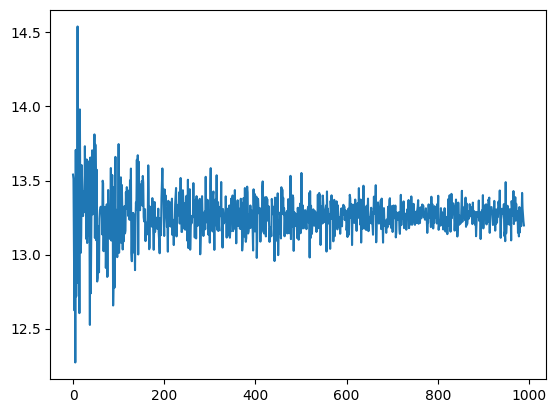

In [ ]:
import random

mean = []
for i in range(10,1000,1):
    sample = pd.Series(random.sample(list(df['temp_ann']), i))
    mean.append(sample.mean())

sns.lineplot(mean)
